<a href="https://colab.research.google.com/github/D1am0ndDude/HouseHold_Income_Final/blob/Claytons-Branch/Linear_Model_Clayton_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv(Path('Income_All.csv'))
df.head()

,id,year,expenditures,expenditure_amount,income_amount
0,1,2019,Accommodation services,24927,24971
1,2,2019,Actual rentals for housing,45046,45048
2,3,2019,Alcoholic beverages,20762,20710
3,4,2019,Alcoholic beverages and tobacco,25032,25036
4,5,2019,All groups,21318,21318


In [ ]:
new_df = df.drop('expenditures', axis=1) 
new_df.head()

,id,year,expenditure_amount,income_amount
0,1,2019,24927,24971
1,2,2019,45046,45048
2,3,2019,20762,20710
3,4,2019,25032,25036
4,5,2019,21318,21318


In [ ]:
y = new_df['income_amount'] 
y

0      24971
1      45048
2      20710
3      25036
4      21318
       ...  
231     5000
232    13113
233    14481
234    16188
235    17033
Name: income_amount, Length: 236, dtype: int64

In [ ]:
X = new_df.drop('income_amount', axis =1)
X

,id,year,expenditure_amount
0,1,2019,24927
1,2,2019,45046
2,3,2019,20762
3,4,2019,25032
4,5,2019,21318
...,...,...,...
231,232,2022,5246
232,233,2022,12987
233,234,2022,14295
234,235,2022,16198


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,id,year,expenditure_amount
195,196,2022,15450
48,49,2019,23001
23,24,2019,20215
22,23,2019,20376
150,151,2021,19885
...,...,...,...
87,88,2020,40138
103,104,2020,18279
67,68,2020,19934
24,25,2019,21659


In [ ]:
X_test

,id,year,expenditure_amount
166,167,2021,24595
226,227,2022,21692
232,233,2022,12987
111,112,2020,21168
59,60,2020,26250
62,63,2020,26463
81,82,2020,20197
210,211,2022,18921
74,75,2020,19359
88,89,2020,26418


In [ ]:
lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_lr_train_pred = lr.predict(X_train) 
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([15451.14293236, 22999.89367156, 20199.46929933, 20361.08280828,
       19894.13434045, 15489.32319281, 36275.4810272 , 22047.43376314,
       23254.69945557, 20409.66682337, 24360.65645603, 20012.836562  ,
       15956.43747796, 10157.76106912, 18802.53607132, 22653.12372287,
       18490.44147831, 19904.44043623, 22227.25766497, 38742.78063398,
       23417.02742331, 24749.27173095, 20344.57046546, 21676.80056164,
       16615.74751279, 17680.48363143, 20004.18571508, 44068.76553385,
       21875.03566355, 37333.67835351, 21537.81562815, 20114.86735723,
       16411.47198115, 17488.91905995, 45136.99325648, 20082.10399278,
       22026.53532878, 23176.67038503, 20545.07579479, 19556.33357252,
       22099.05183263, 25911.49330295, 17306.37960439, 20434.33363868,
       19671.19177702,  7888.68709841, 21551.13682124, 20918.69567068,
       19701.34930307, 19951.2715436 , 23420.76630383, 16558.57424223,
       16943.81635047, 20451.31790936, 15646.68325899, 12383.99207769,
      

In [ ]:
y_lr_test_pred

array([24626.1559056 , 21723.20910932, 12980.71086846, 21171.89250834,
       26271.41862742, 26485.61941885, 20193.94908816, 18938.66041221,
       19351.65717032, 26442.76315593, 20078.07994696, 23416.52707252,
       21456.24191733, 22422.76300169, 24713.67437546, 22811.10058897,
       28376.16919175, 19308.06001387, 15516.53118937, 21958.80669773,
       18992.26627586, 20045.13564306,  9311.67342491, 15642.70750385,
       25035.71790557, 23549.90834744, 20839.9729198 , 20104.79614789,
       18422.35080154, 16826.83096924,  5205.79492752, 20264.60081395,
       19899.97288546, 16251.98564893, 25046.08667031, 19767.18962019,
       20927.23464728, 19814.92087143, 18126.17926366, 21886.15953329,
       22871.91050238, 21058.46887771, 20048.45378525, 21540.61462929,
       17796.31778273, 25421.7275089 , 20022.40176425, 16589.18382839])

In [ ]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred) 
lr_train_r2 = r2_score(y_train, y_lr_train_pred) 

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred) 
lr_test_r2 = r2_score(y_test, y_lr_test_pred)



In [ ]:
print('LR MSE (Train): ', lr_train_mse) 
print('LR R2 (Train): ', lr_train_r2) 
print('LR MSE (Test): ', lr_test_mse) 
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  10617.88200966583
LR R2 (Train):  0.9997116305169299
LR MSE (Test):  6941.752214437227
LR R2 (Test):  0.9996115081518518


In [ ]:
lr_results =pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose() 
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,10617.88201,0.999712,6941.752214,0.999612


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2,random_state=100) 
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
y_rf_train_pred = rf.predict(X_train) 
y_rf_test_pred = rf.predict(X_test)

In [ ]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred) 
rf_train_r2 = r2_score(y_train, y_rf_train_pred) 

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred) 
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results =pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose() 
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,4788524.660762,0.869949,7709631.956247,0.568534


In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0) 
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,10617.88201,0.999712,6941.752214,0.999612
0,Random Forest,4788524.660762,0.869949,7709631.956247,0.568534


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,10617.88201,0.999712,6941.752214,0.999612
1,Random Forest,4788524.660762,0.869949,7709631.956247,0.568534


Text(0.5, 0, 'Years')

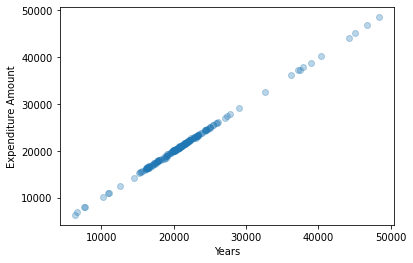

In [ ]:
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3) 


plt.plot()
plt.ylabel('Expenditure Amount') 
plt.xlabel('Years')

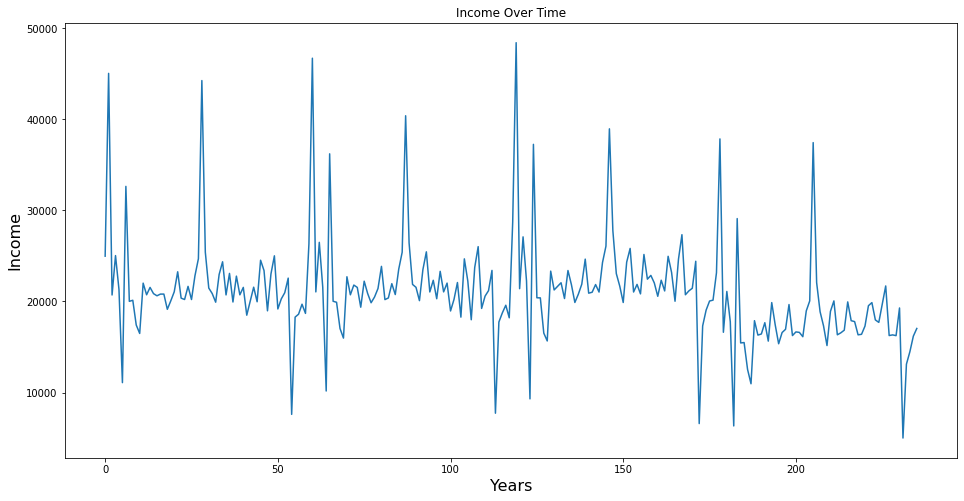

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Income Over Time')
plt.plot(df['income_amount'])
plt.ylabel('Income', fontsize=16)
plt.xlabel('Years',fontsize=16)
plt.show()

In [ ]:
# Create a new DF with the income column
data = df.filter(['income_amount'])

# Convert the DF to a numpy array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

189

In [ ]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.45997052],
       [0.92238242],
       [0.3618315 ],
       [0.46146759],
       [0.37583491],
       [0.14010318],
       [0.63653324],
       [0.34575522],
       [0.34844995],
       [0.28584919],
       [0.26452163],
       [0.391773  ],
       [0.3623382 ],
       [0.38094799],
       [0.36526325],
       [0.35978166],
       [0.36408863],
       [0.36408863],
       [0.32560228],
       [0.34695288],
       [0.36982358],
       [0.42051684],
       [0.35383942],
       [0.3504307 ],
       [0.38359666],
       [0.35031554],
       [0.41042885],
       [0.4536828 ],
       [0.9041872 ],
       [0.47017366],
       [0.37935879],
       [0.36540145],
       [0.34359022],
       [0.41369939],
       [0.44582892],
       [0.36201575],
       [0.41641715],
       [0.34409692],
       [0.40950758],
       [0.36224607],
       [0.38106315],
       [0.31072366],
       [0.34626192],
       [0.38154682],
       [0.34467272],
       [0.44974435],
       [0.42360311],
       [0.321

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the Data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.45997052, 0.92238242, 0.3618315 , 0.46146759, 0.37583491,
       0.14010318, 0.63653324, 0.34575522, 0.34844995, 0.28584919,
       0.26452163, 0.391773  , 0.3623382 , 0.38094799, 0.36526325,
       0.35978166, 0.36408863, 0.36408863, 0.32560228, 0.34695288,
       0.36982358, 0.42051684, 0.35383942, 0.3504307 , 0.38359666,
       0.35031554, 0.41042885, 0.4536828 , 0.9041872 , 0.47017366,
       0.37935879, 0.36540145, 0.34359022, 0.41369939, 0.44582892,
       0.36201575, 0.41641715, 0.34409692, 0.40950758, 0.36224607,
       0.38106315, 0.31072366, 0.34626192, 0.38154682, 0.34467272,
       0.44974435, 0.42360311, 0.32177899, 0.41482795, 0.46091483,
       0.3264775 , 0.3520199 , 0.36756645, 0.40446359, 0.05985997,
       0.3058409 , 0.31323414, 0.33847713, 0.31526095, 0.49124787])]
[0.9607536044958312]

[array([0.45997052, 0.92238242, 0.3618315 , 0.46146759, 0.37583491,
       0.14010318, 0.63653324, 0.34575522, 0.34844995, 0.28584919,
       0.26452163, 0.391773  , 0.362

In [ ]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(129, 60, 1)

In [ ]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Complite the model
model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
129/129 [==============================] - 7s 30ms/step - loss: 0.0279
Epoch 2/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0228
Epoch 3/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0216
Epoch 4/100
129/129 [==============================] - 4s 31ms/step - loss: 0.0208
Epoch 5/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0233
Epoch 6/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0210
Epoch 7/100
129/129 [==============================] - 4s 29ms/step - loss: 0.0205
Epoch 8/100
129/129 [==============================] - 4s 29ms/step - loss: 0.0209
Epoch 9/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0202
Epoch 10/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0196
Epoch 11/100
129/129 [==============================] - 4s 29ms/step - loss: 0.0216
Epoch 12/100
129/129 [==============================] - 4s 30ms/step - loss: 0.0203
E

In [ ]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted income
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 15ms/step


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

3661.035862699468

<ipython-input-19-5569dd98ed44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


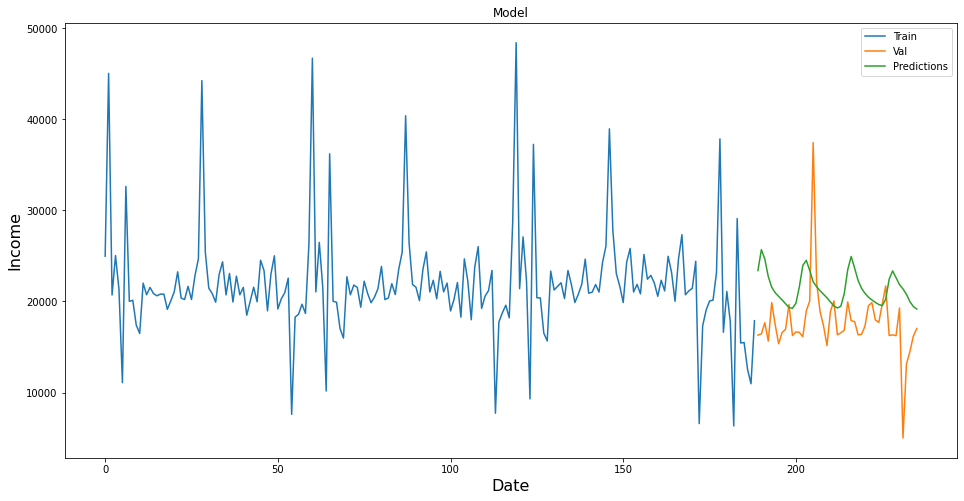

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('Income', fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.plot(train['income_amount'])
plt.plot(valid[['income_amount', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [ ]:
# Show the valid and predicted incomes
valid

,income_amount,Predictions
189,16305,23393.738281
190,16428,25693.097656
191,17667,24655.519531
192,15644,22730.798828
193,19875,21560.761719
194,17443,20964.283203
195,15354,20555.400391
196,16585,20165.253906
197,16942,19752.148438
198,19660,19333.632812


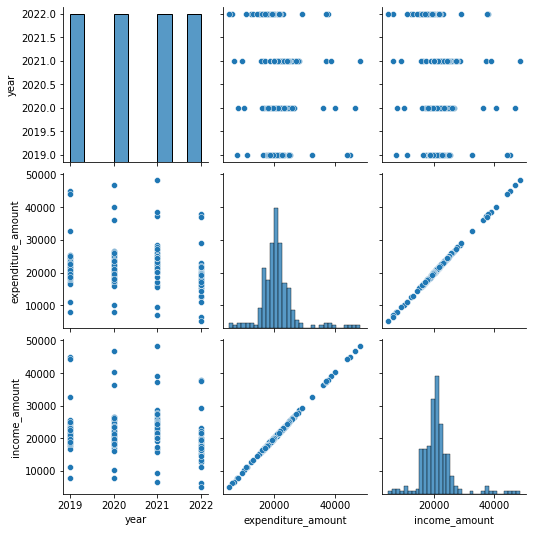

In [ ]:
import seaborn as sns
df = df.drop(columns='id')
sns.pairplot(df)

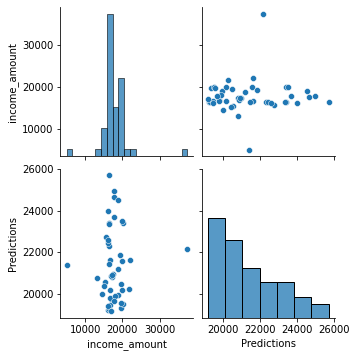

In [ ]:
sns.pairplot(valid)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


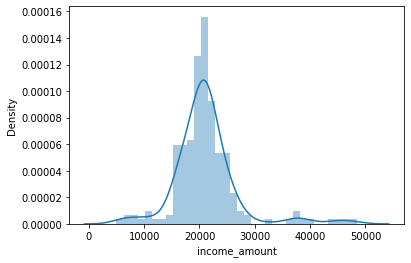

In [ ]:
sns.distplot(df['income_amount'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


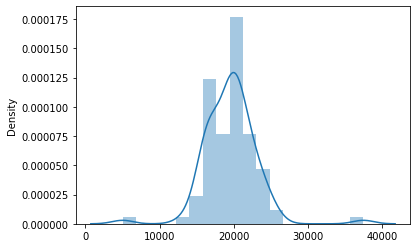

In [ ]:
sns.distplot(valid)

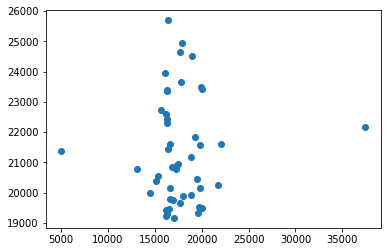

In [ ]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


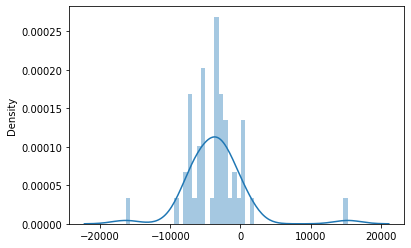

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4437.454828789893
MSE: 30807537.846936245
RMSE: 5550.453841528299
